In [1]:
import torch
import numpy as np
from dataloader import load_complete_dataset
from pca import plot_scree, analyze_with_pca
from KNN_classifier import knn_comparison
import sys
import os


Files already downloaded and verified


In [3]:
#GPU is love GPU is life

# Clear any existing CUDA settings
if 'PYTORCH_CUDA_ALLOC_CONF' in os.environ:
    del os.environ['PYTORCH_CUDA_ALLOC_CONF']

# Initialize CUDA with default settings
device = 'cuda' if torch.cuda.is_available() else 'cpu'
if device == 'cuda':
    torch.cuda.init()
    torch.cuda.empty_cache()

device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f"Using device: {device}")

Using device: cuda


In [4]:
# Load datasets
print("Loading datasets...")
mnist_data, mnist_labels, cifar_data, cifar_labels = load_complete_dataset()

print("\nOriginal shapes:")
print(f"MNIST data shape: {mnist_data.shape}")
print(f"CIFAR-10 data shape: {cifar_data.shape}")

Loading datasets...
Files already downloaded and verified
Full MNIST data shape: torch.Size([60000, 784])
Full CIFAR-10 data shape: torch.Size([50000, 3072])

Original shapes:
MNIST data shape: torch.Size([60000, 784])
CIFAR-10 data shape: torch.Size([50000, 3072])



Analyzing MNIST...

Analyzing MNIST variance with 784 components...
Using batch size of 4000 on cuda

Computing covariance matrix...
Processed batch 1/15
Processed batch 11/15

Computing eigendecomposition...


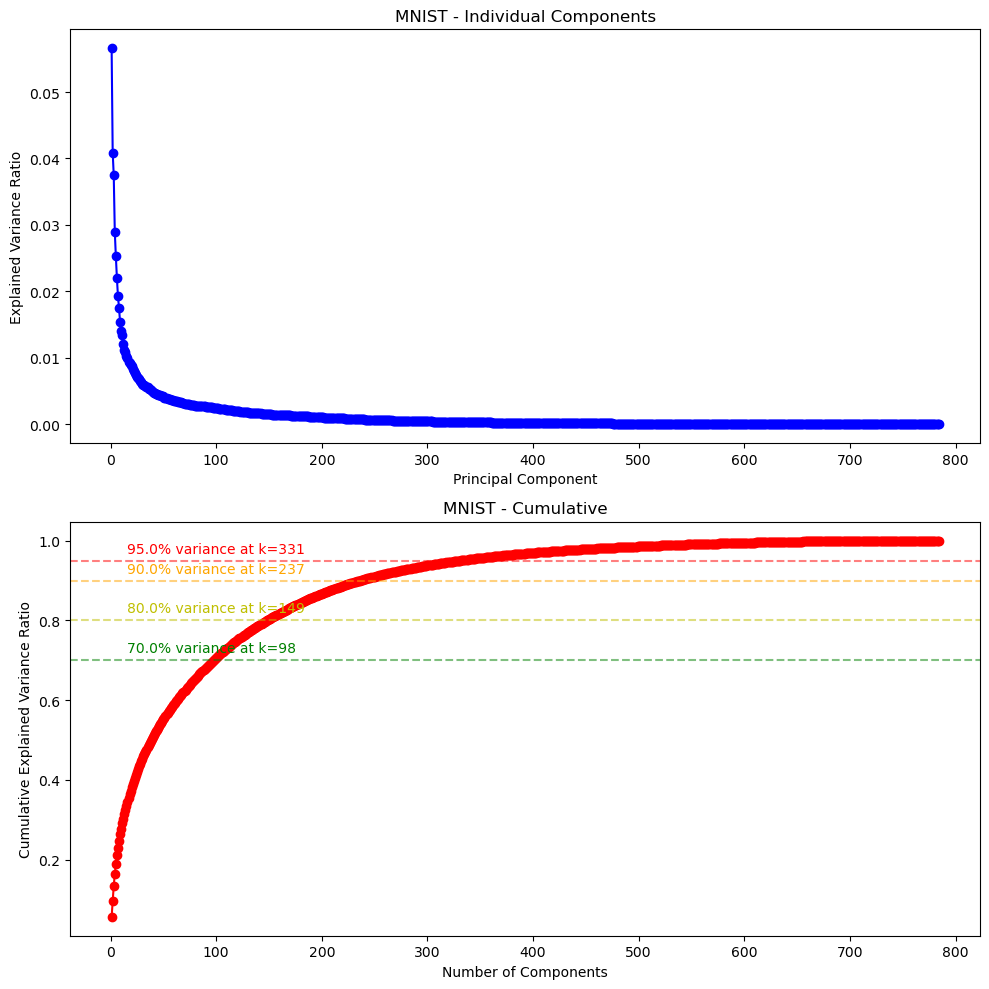


MNIST Variance Analysis:
Components needed for 70.0% variance: 98
Components needed for 80.0% variance: 149
Components needed for 90.0% variance: 237
Components needed for 95.0% variance: 331


In [5]:
print("\nAnalyzing MNIST...")
mnist_var_exp, mnist_k_values, mnist_eigenvecs = plot_scree(
    mnist_data, "MNIST", batch_size=4000, device=device
)
mnist_k = mnist_k_values[0.95]  # Choose k for 95%


Analyzing CIFAR-10...

Analyzing CIFAR-10 variance with 3072 components...
Using batch size of 5000 on cuda

Computing covariance matrix...
Processed batch 1/10

Computing eigendecomposition...


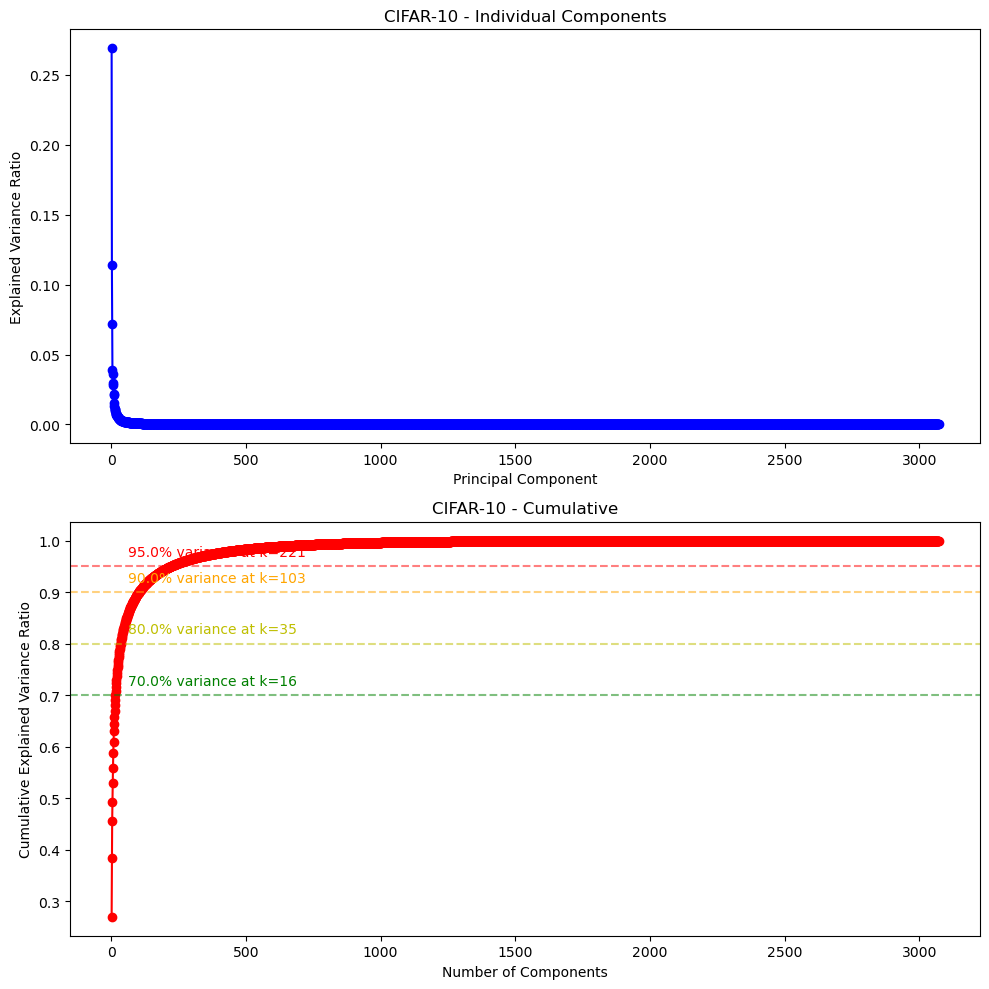


CIFAR-10 Variance Analysis:
Components needed for 70.0% variance: 16
Components needed for 80.0% variance: 35
Components needed for 90.0% variance: 103
Components needed for 95.0% variance: 221


In [6]:
print("\nAnalyzing CIFAR-10...")
cifar_var_exp, cifar_k_values, cifar_eigenvecs = plot_scree(
    cifar_data, "CIFAR-10", batch_size=5000, device=device
)
cifar_k = cifar_k_values[0.95]  # Choose k for 95%


Reducing dimensions...

Reducing MNIST dimensions...

Analyzing MNIST variance with 331 components...
Using batch size of 4000 on cuda

Computing covariance matrix...
Processed batch 1/15
Processed batch 11/15

Computing eigendecomposition...


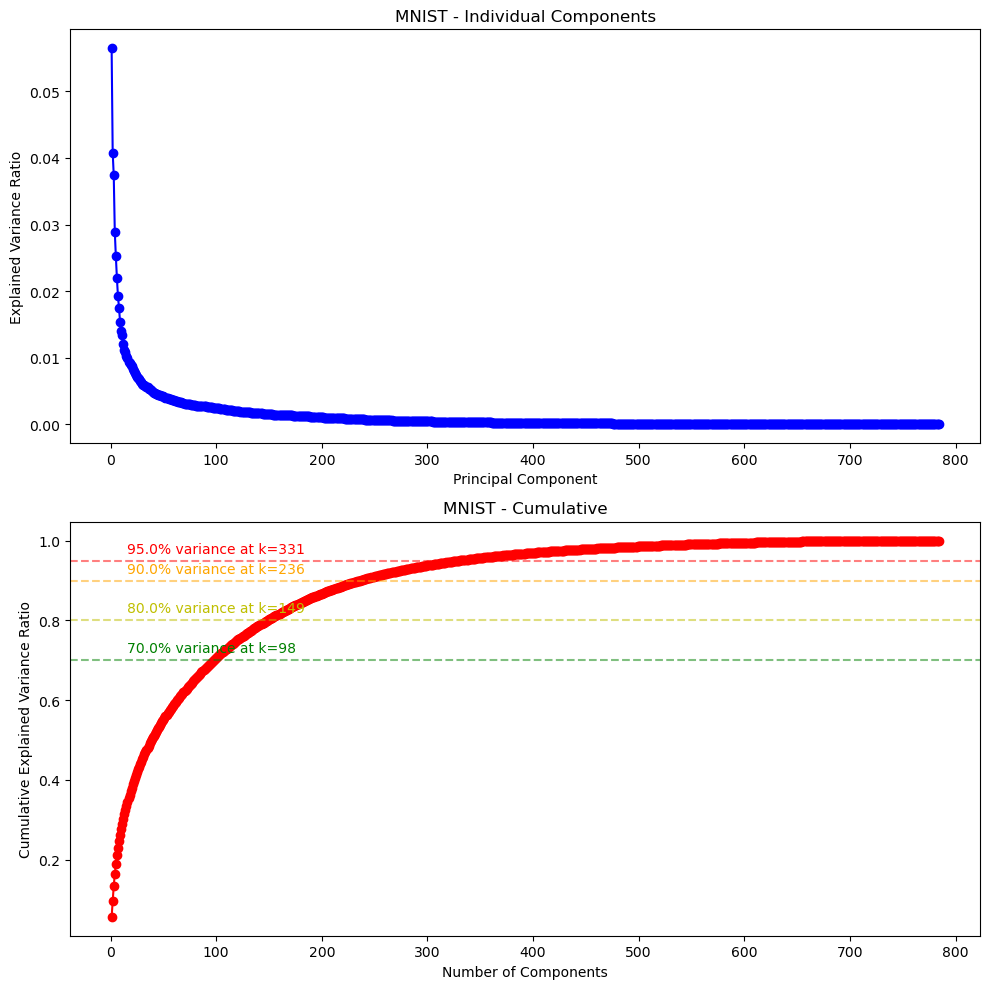


MNIST Variance Analysis:
Components needed for 70.0% variance: 98
Components needed for 80.0% variance: 149
Components needed for 90.0% variance: 236
Components needed for 95.0% variance: 331
Processed batch 1/15
Processed batch 11/15
Reduced MNIST shape: (60000, 331)

Reducing CIFAR-10 dimensions...

Analyzing CIFAR-10 variance with 221 components...
Using batch size of 5000 on cuda

Computing covariance matrix...
Processed batch 1/10

Computing eigendecomposition...


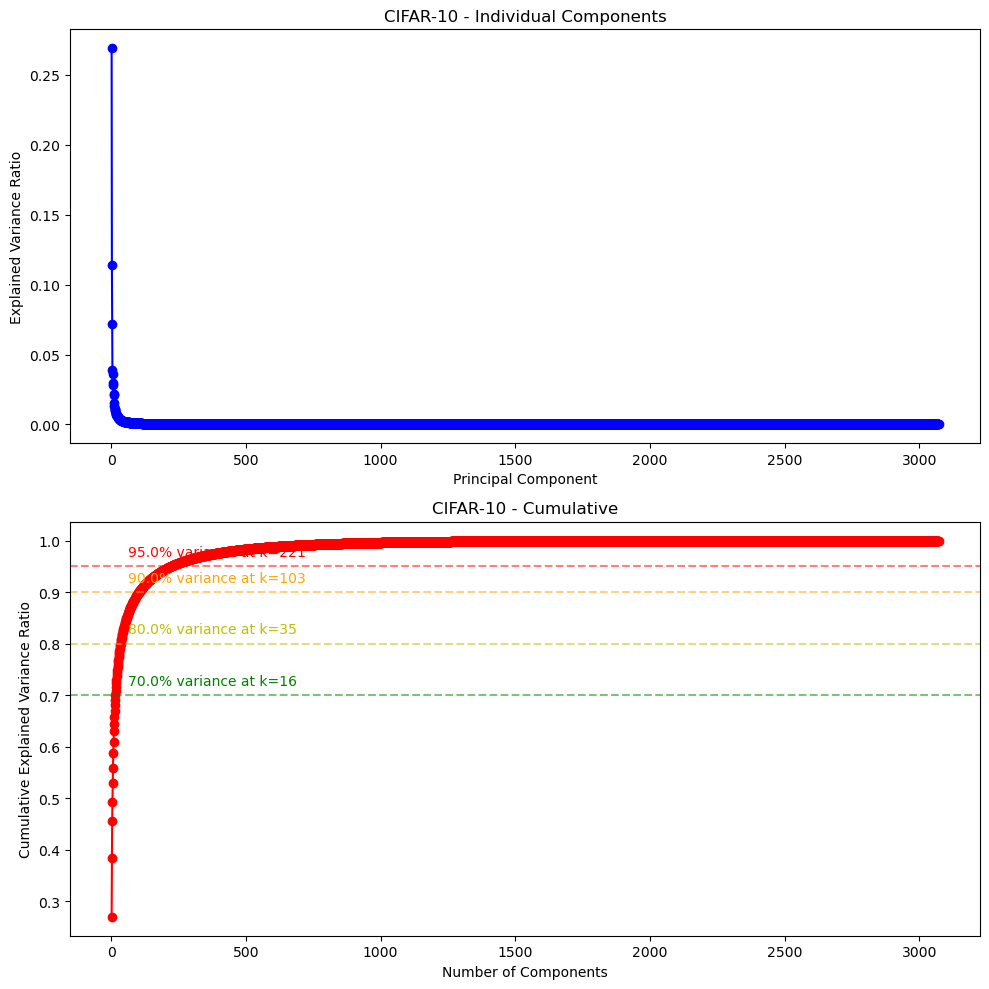


CIFAR-10 Variance Analysis:
Components needed for 70.0% variance: 16
Components needed for 80.0% variance: 35
Components needed for 90.0% variance: 103
Components needed for 95.0% variance: 221
Processed batch 1/10
Reduced CIFAR-10 shape: (50000, 221)


In [7]:
# Perform dimension reduction
print("\nReducing dimensions...")
mnist_reduced = analyze_with_pca(
    mnist_data, "MNIST", k=mnist_k, batch_size=4000, device=device
)

cifar_reduced = analyze_with_pca(
    cifar_data, "CIFAR-10", k=cifar_k, batch_size=5000, device=device
)

# Optional: Clear GPU memory
torch.cuda.empty_cache()

In [8]:
# Perform KNN classification
print("\nPerforming KNN classification...")
mnist_results = knn_comparison(mnist_data, mnist_reduced, mnist_labels)
print("\nMNIST Results:")
print(f"Original Data Accuracy: {mnist_results['original_accuracy']:.4f}")
print(f"Reduced Data Accuracy: {mnist_results['reduced_accuracy']:.4f}")


Performing KNN classification...

MNIST Results:
Original Data Accuracy: 0.9715
Reduced Data Accuracy: 0.9482


In [9]:
cifar_results = knn_comparison(cifar_data, cifar_reduced, cifar_labels)
print("\nCIFAR-10 Results:")
print(f"Original Data Accuracy: {cifar_results['original_accuracy']:.4f}")
print(f"Reduced Data Accuracy: {cifar_results['reduced_accuracy']:.4f}")


CIFAR-10 Results:
Original Data Accuracy: 0.3325
Reduced Data Accuracy: 0.3539
